# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

In this dataset we predict the insurance costs

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

In [2]:
# Read datasets
df=pd.read_csv("medical cost insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


These datasets contain the data of medical cost insurance . On the basis of the data we have to predict the insurance costs.

These datasets contain the data like "Age","Sex","Bmi", "Children","Smoker","Region","Charges". in medical cost insurance in this datsets my "Charges"columns is target variable.

In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


# Exploratory data analysis

In [6]:
# Checking the dimension of the dataset
df.shape

(1338, 7)

In [7]:
print("The dimensions of the dataset: ",df.shape)
print("The column headers :",df.columns)

The dimensions of the dataset:  (1338, 7)
The column headers : Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Here we can see that in this datasets contain 1338 rows and 7 columns.

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# checking the types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
# Now checking null values in this dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [13]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we clear see that there is no null value present in this datasets

<Axes: >

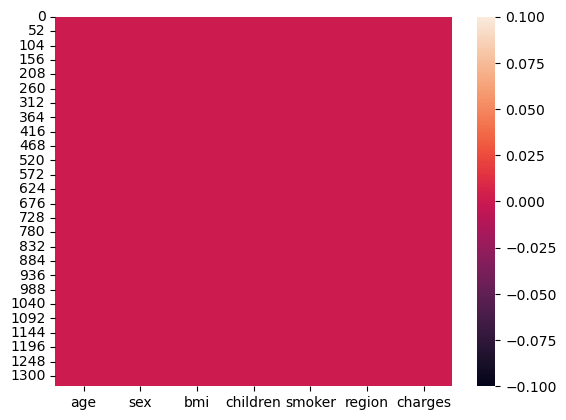

In [16]:
# Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [17]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

Here is the detail of this datsets in numercial form

In [18]:
# Separating Numerical and Categorical Columns

# Checking for categorical Coumns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = []
for i  in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Categorical Columns:  ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']


Here can clear see that there is three columns contain Categorical Data and four column contain numerical data

In [19]:
# Checking number of uniqie values in ech column
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [20]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Checking duplicates in DataFrame

In [21]:
print("Total Duplicates Rows are ",df.duplicated().sum())

Total Duplicates Rows are  1


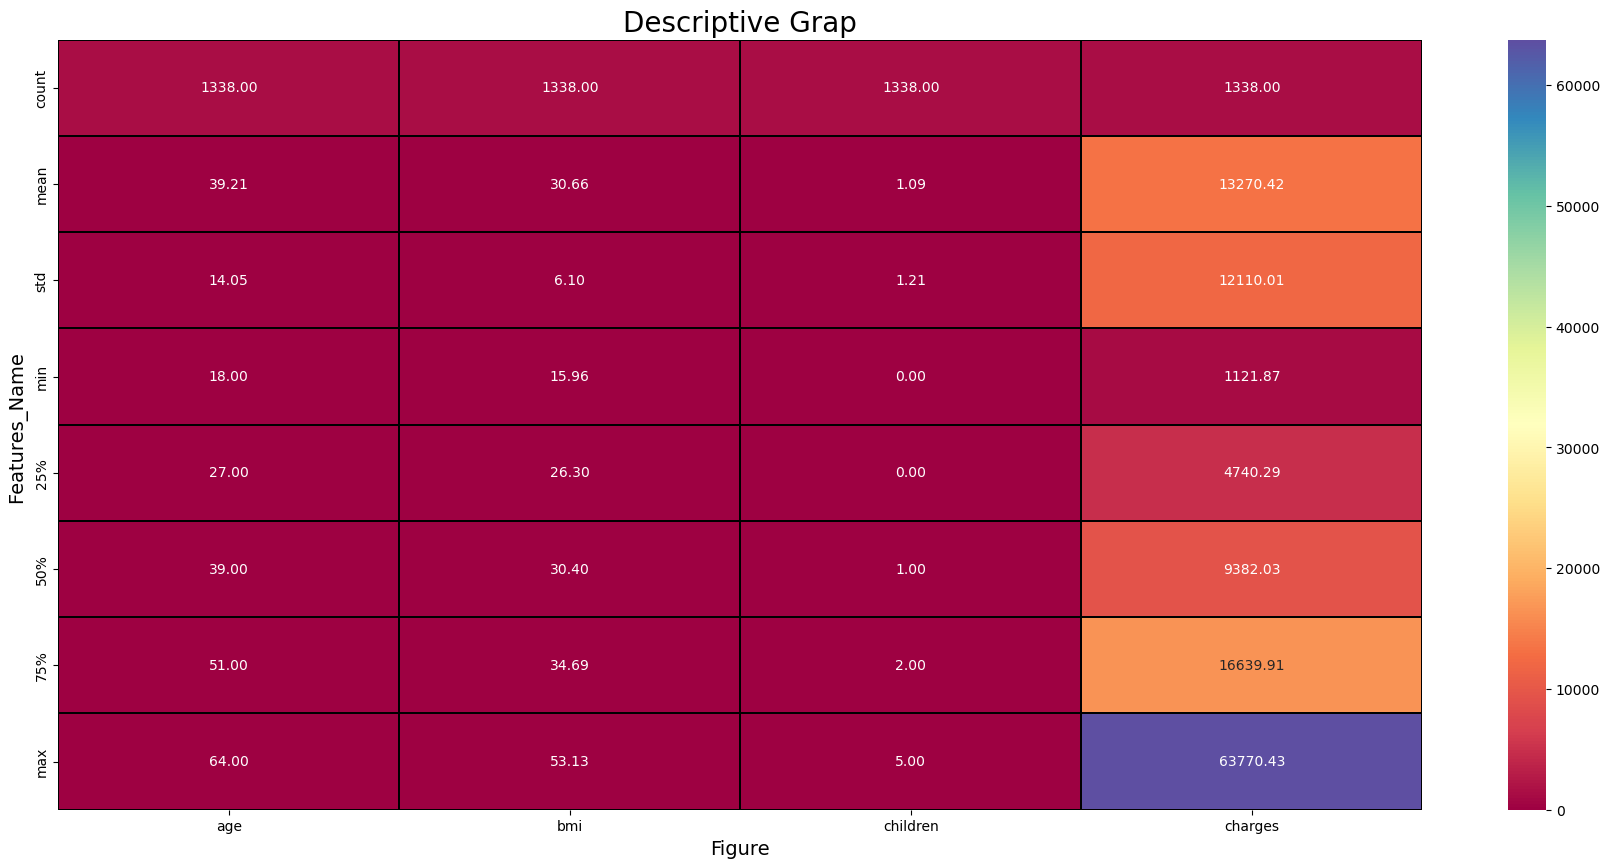

In [22]:
plt.figure(figsize = (22,10))
sns.heatmap(df.describe(),annot = True ,fmt = '0.2f',linewidth = .2,linecolor = 'black', cmap = "Spectral")
plt.xlabel('Figure',fontsize = 14)
plt.ylabel('Features_Name ',fontsize = 14)
plt.title("Descriptive Grap" , fontsize=20)
plt.show()

# Visualize the data

male      676
female    662
Name: sex, dtype: int64


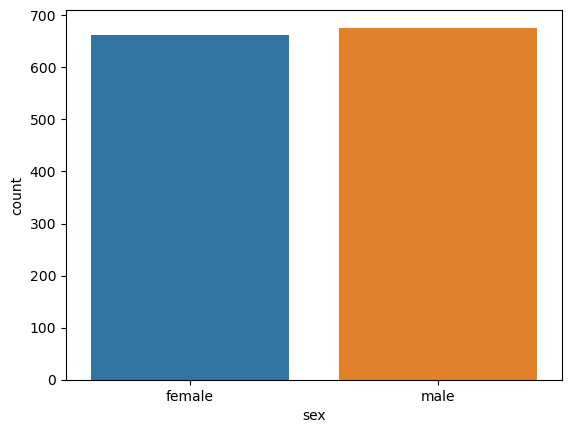

In [23]:
# visualize the number of  people
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

As you can see, both male and female are same .But male is more  as comapared to female

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


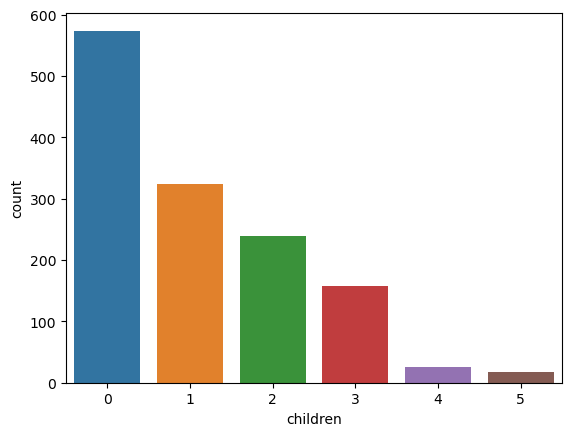

In [24]:
# visualize the number of children 
ax=sns.countplot(x='children',data=df)
print(df['children'].value_counts())

The 'children' column in the Medical Cost Insurance dataset represents children which represents the number of children a policy holder has who are under the age of 18. If this column is filled as '0', it means that the policy holder has no children. Whereas if it is filled as '1', '2', '3' etc., it shows that the policy holder has that number of children.

But in this datasets whose policy holder children is "Zero" is more as to compared to other policy holder

no     1064
yes     274
Name: smoker, dtype: int64


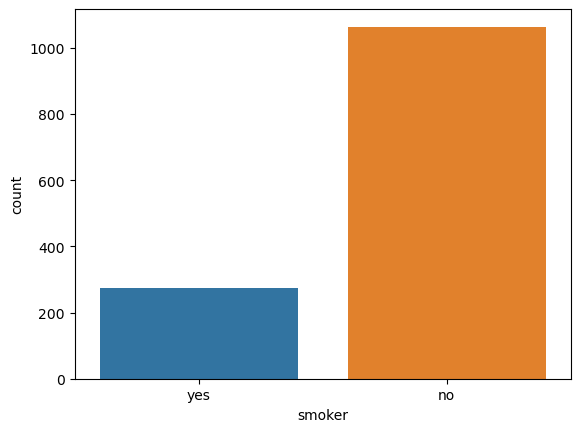

In [25]:
# visualize the number of smoker
ax=sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

The 'smoker' column in the Medical Cost Insurance dataset provides information about smoking. This column indicates whether the person smokes or not. If a person has a habit of smoking, they are labeled as a 'smoker'. This information can be used in calculating insurance premiums or in the transfer process, as individuals who smoke may be expected to have higher medical expenses.

But in this data set, non-smokers are more likely to smoke than smokers.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


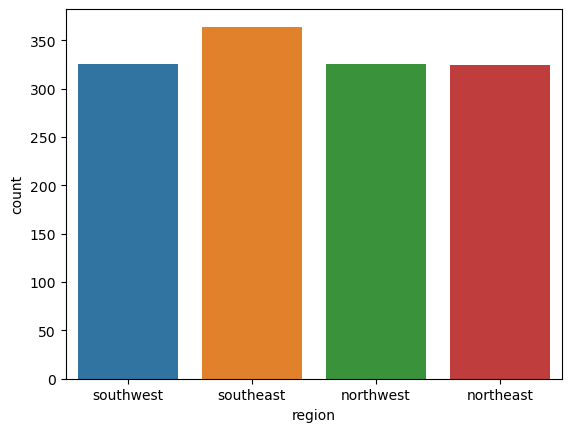

In [26]:
# visualize the number of region
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())

In "region" column typically indicates the geographic region where the insured individual resides or is covered under the insurance plan.
Here we can see that for those people who lives in southeast is getting more insurance as compared to other

In [27]:
# Here we check the maximum and minimum quality rate
print("Min. Charges taken from insurance:", df.charges.min())
print("Max Charges taken from insurance: ",df["charges"].max())

Min. Charges taken from insurance: 1121.8739
Max Charges taken from insurance:  63770.42801


Here we can in this datsets has lowest charge is 1121 and highest charges is 63770

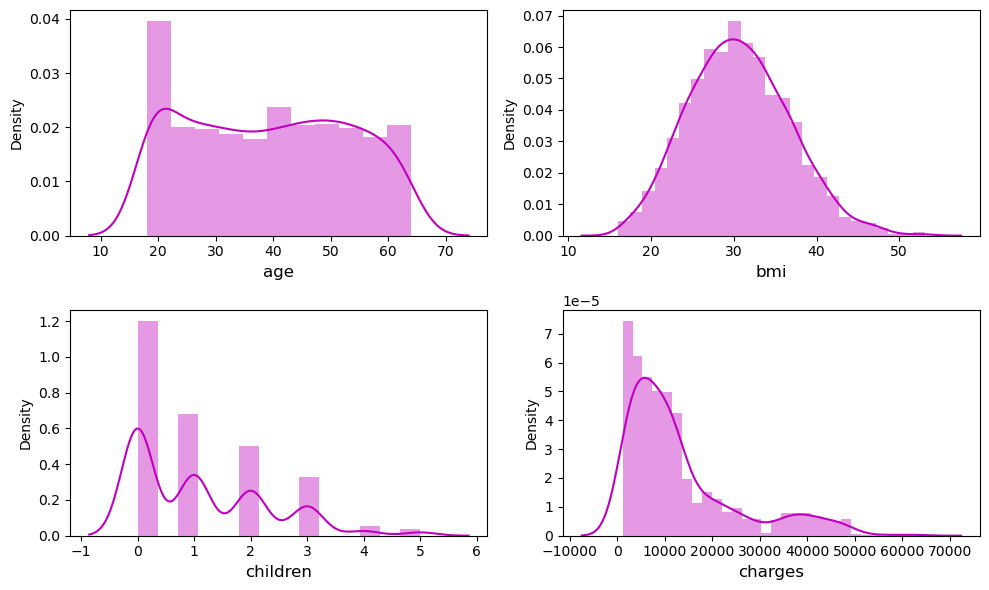

In [28]:
# lets check the how the data has been distributed in remaining column
plt.figure(figsize=(10,6),facecolor= 'white')
plotnumber=1
for col in numerical_col:
    ax=plt.subplot(2,2,plotnumber)
    sns.distplot(df[col],color="m")
    plt.xlabel(col,fontsize=12)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Relation Analysis

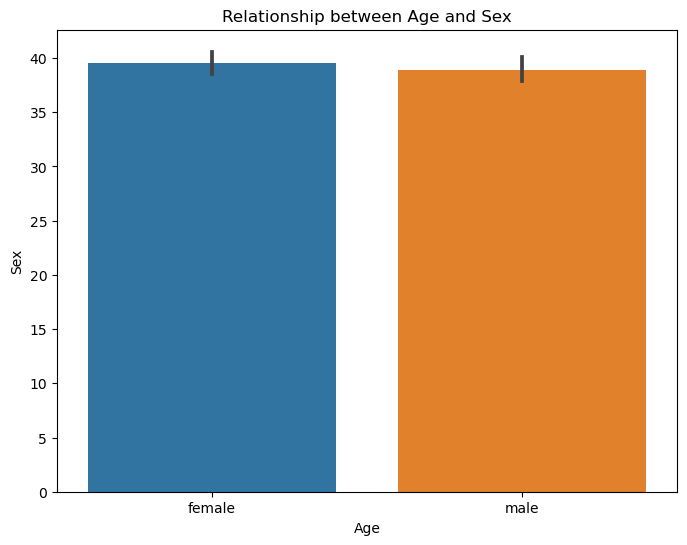

In [29]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="sex", y="age", data=df)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Sex")
plt.title("Relationship between Age and Sex")

# Show the plot
plt.show()

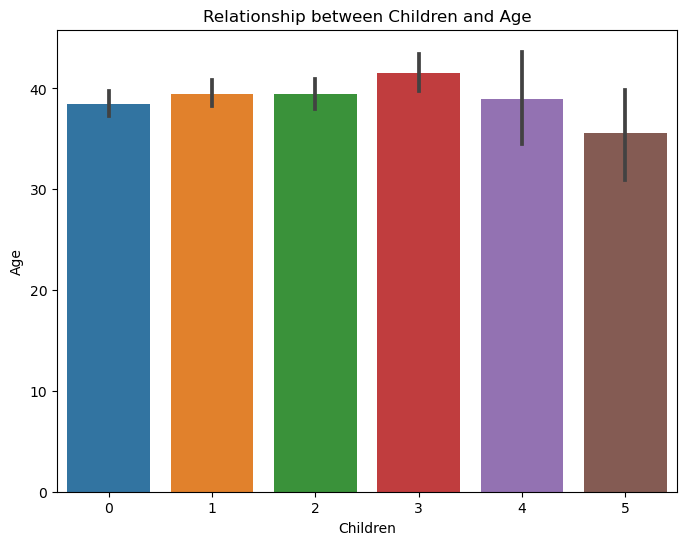

In [30]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="children", y="age", data=df)

# Set labels and title
plt.xlabel("Children")
plt.ylabel("Age")
plt.title("Relationship between Children and Age")

# Show the plot
plt.show()

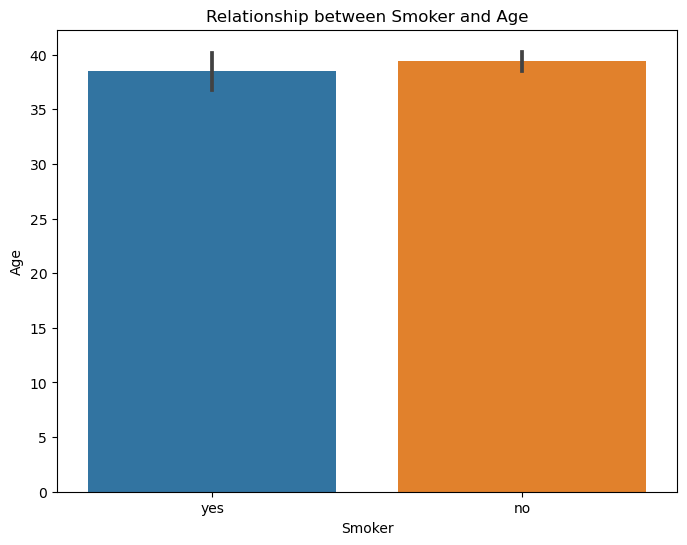

In [31]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="smoker", y="age", data=df)

# Set labels and title
plt.xlabel("Smoker")
plt.ylabel("Age")
plt.title("Relationship between Smoker and Age")

# Show the plot
plt.show()

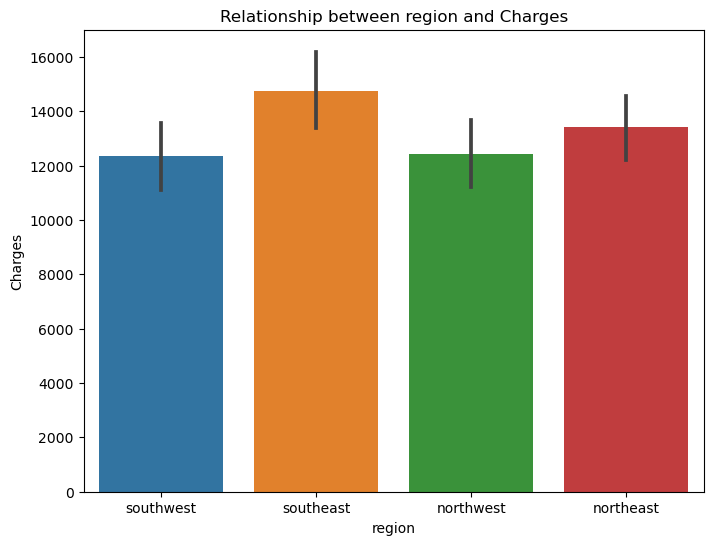

In [32]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="region", y="charges", data=df)

# Set labels and title
plt.xlabel("region")
plt.ylabel("Charges")
plt.title("Relationship between region and Charges")

# Show the plot
plt.show()

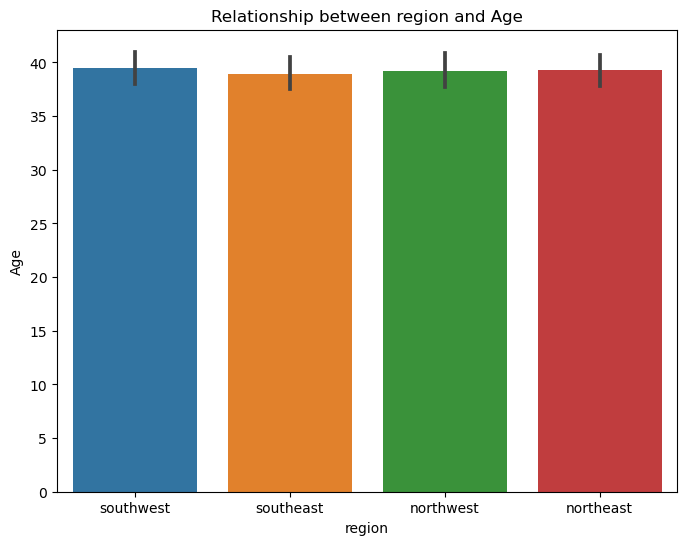

In [33]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="region", y="age", data=df)

# Set labels and title
plt.xlabel("region")
plt.ylabel("Age")
plt.title("Relationship between region and Age")

# Show the plot
plt.show()

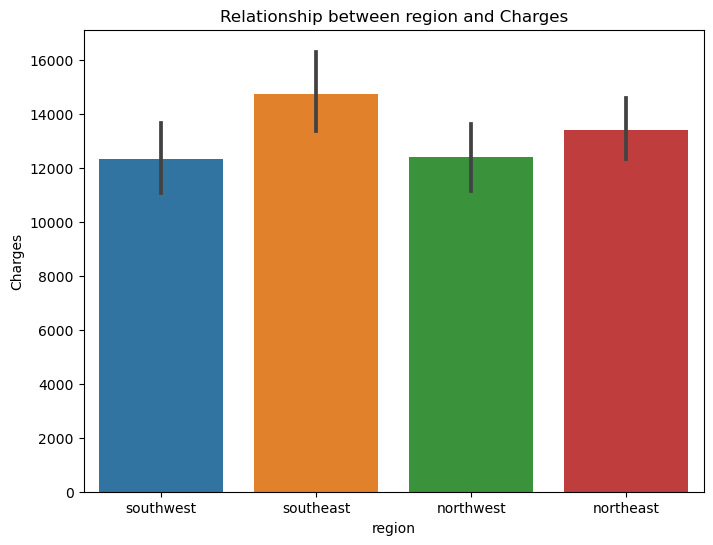

In [34]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="region", y="charges", data=df)

# Set labels and title
plt.xlabel("region")
plt.ylabel("Charges")
plt.title("Relationship between region and Charges")

# Show the plot
plt.show()

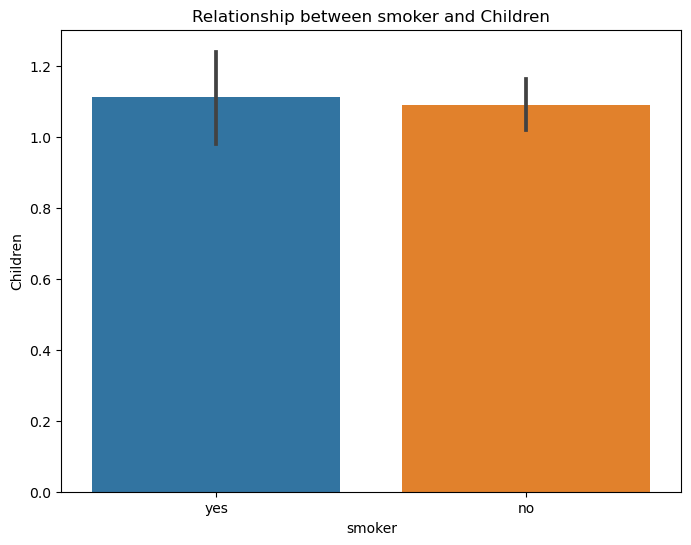

In [35]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="smoker", y="children", data=df)

# Set labels and title
plt.xlabel("smoker")
plt.ylabel("Children")
plt.title("Relationship between smoker and Children")

# Show the plot
plt.show()

# Multivariate analysis

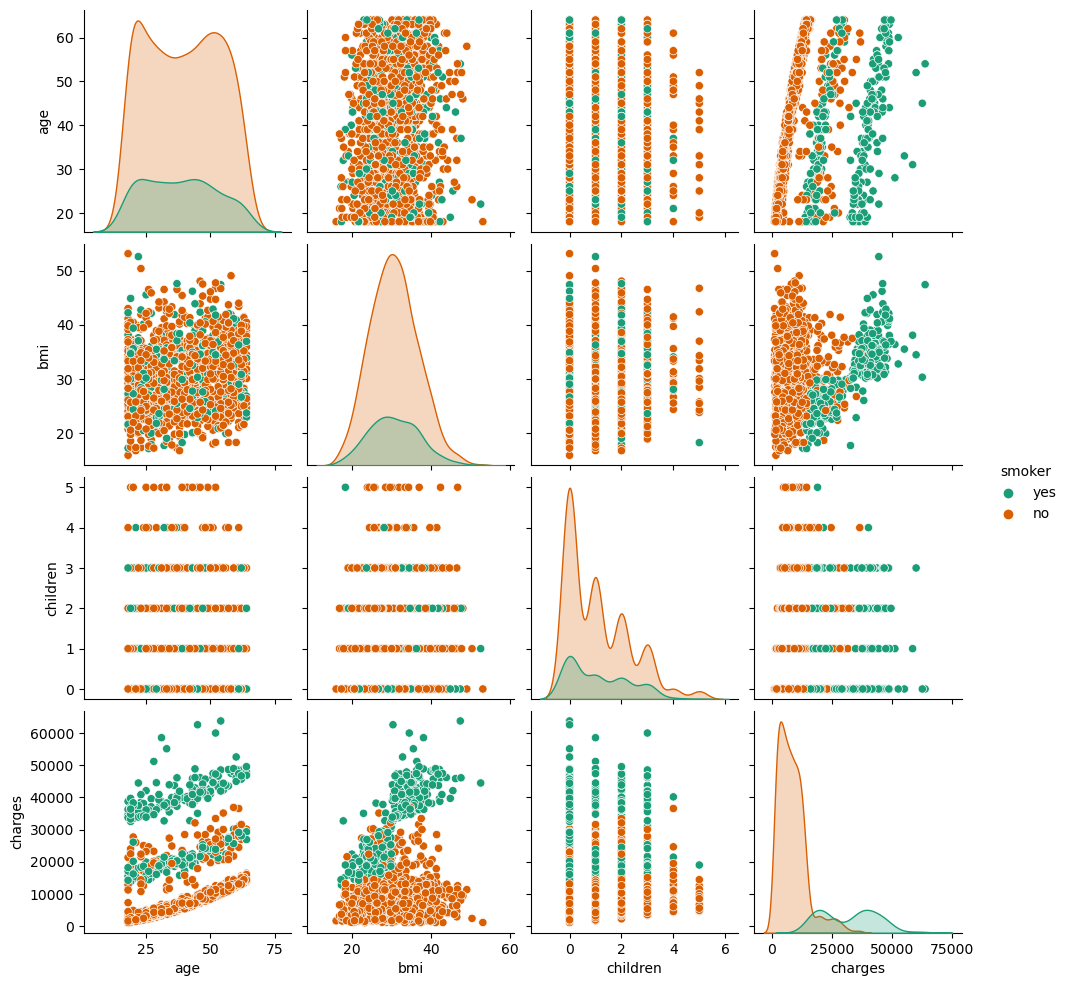

In [36]:
sns.pairplot(df,hue = "smoker",palette="Dark2")
plt.show()

# Checking for outliers

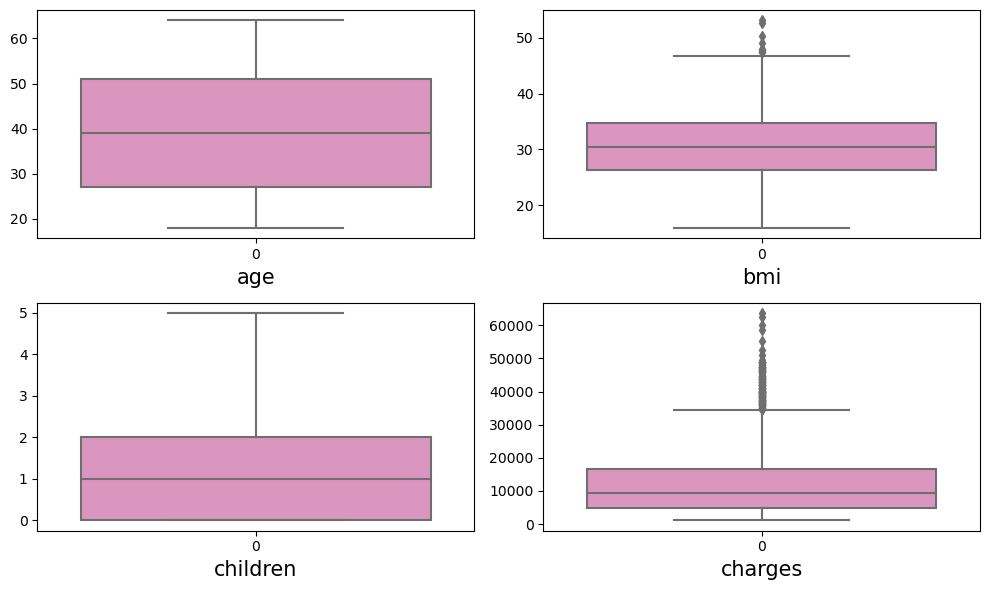

In [37]:
# lets check the outliers by plotting boxplot

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation = 0 , fontsize= 10)
        plotnumber+=1
plt.tight_layout()

Here we can see that there are two column has outliers but the charges columns is my target variable so no need to changes but in bmi has also outliers so now we will remove outliers .

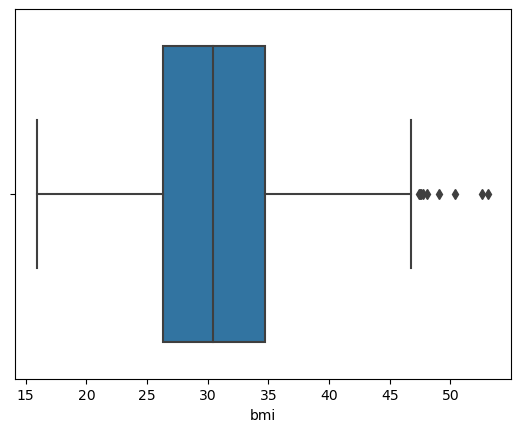

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Checking outliers for 'bmi' using boxplot
sns.boxplot(x=df['bmi'])
plt.show()


# Using IQR method to remove outliers

In [39]:
# Calculate IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df.loc[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# Remove outliers
df1 = df.loc[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1329 rows x 7 columns]

Outliers removed:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeas

Here we can see that we have removed the outliers and the df is now converted new data which is df1 here we also loss some data now check 

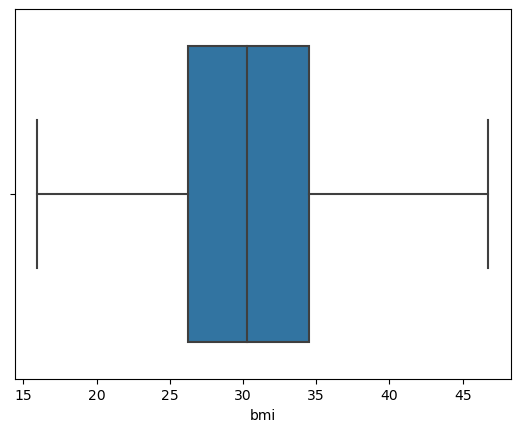

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Checking outliers for 'age' using boxplot
sns.boxplot(x=df1['bmi'])
plt.show()

Here we can also see that the bmi has no extra outlier present after remove the outliers its looks like perfect

In [41]:
# New seperate names 
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now the data df is converted into df1

In [42]:
print("Old DataFrame- ",df.shape[0])  # old datframe
print("New Data Frame- ",df1.shape[0])  # new dataframe

Old DataFrame-  1338
New Data Frame-  1329


In [43]:
# Calculate the data loss
data_loss = df1.shape[0] - df.shape[0], df1.shape[1] - df.shape[1]

# Print the data loss message
print("Data loss:", data_loss)

Data loss: (-9, 0)


Here we can see that by removing the outliers , our 9 rows were also removed.

In [44]:
print("Data Loss Percentage- ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage-  0.672645739910314


Here we can see percentage loss

# Now checking skewness

In [45]:
# Encoding categorical columns using OrdinalEnocoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes =="object":
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


Here the sex column converted into numerical value where
0 indicate "Female" and 1 indicate "Male"  and 
smoker column yes indicate 1 and no indicate 0  and
Region column  here 3 is indicate "SouthWest",2 is indicate "southeast", 1 is indicate "northwest" 
and 0 is "northeast"

In [46]:
# Now all data are converted into numercial form so no we check skewness
df1.skew()

age         0.058413
sex        -0.016573
bmi         0.157180
children    0.936628
smoker      1.471424
region     -0.031651
charges     1.500577
dtype: float64

Here we can see that the smoker and charges column is more skewness but in smokers it is categorical data include in this column so we no need to changes smoker  . But charges columns is also high so now we will reduced the skewness of charges columns

# Removing skewness

In [47]:
# Now we reduced the charges columns skewness using log
charges_skewness = df1['charges'].skew()
print("Skewness of 'charges' before transformation:", charges_skewness)

# Apply logarithmic transformation to 'charges'
df1['log_charges'] = np.log1p(df1['charges'])

# Calculate skewness of transformed 'log_charges'
log_charges_skewness = df1['log_charges'].skew()
print("Skewness of 'log_charges' after transformation:", log_charges_skewness)

Skewness of 'charges' before transformation: 1.5005769673155465
Skewness of 'log_charges' after transformation: -0.09138628175661823


In [48]:
df1.skew()

age            0.058413
sex           -0.016573
bmi            0.157180
children       0.936628
smoker         1.471424
region        -0.031651
charges        1.500577
log_charges   -0.091386
dtype: float64

Here we can see that we reduced the charges column but the new columns also generated when using log.

# Now we check how data is distributed

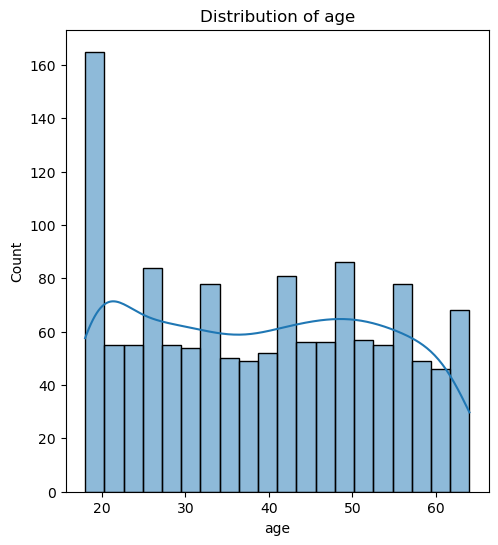

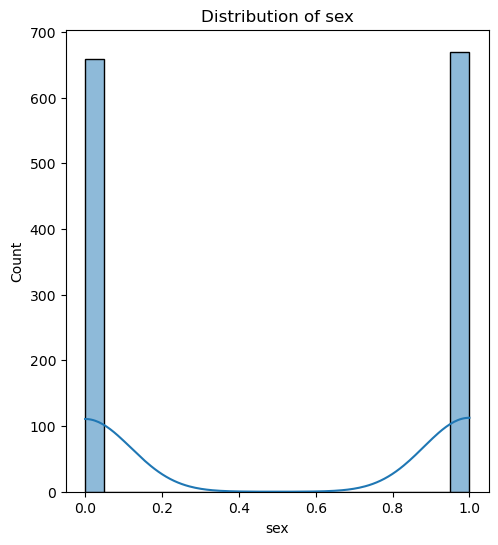

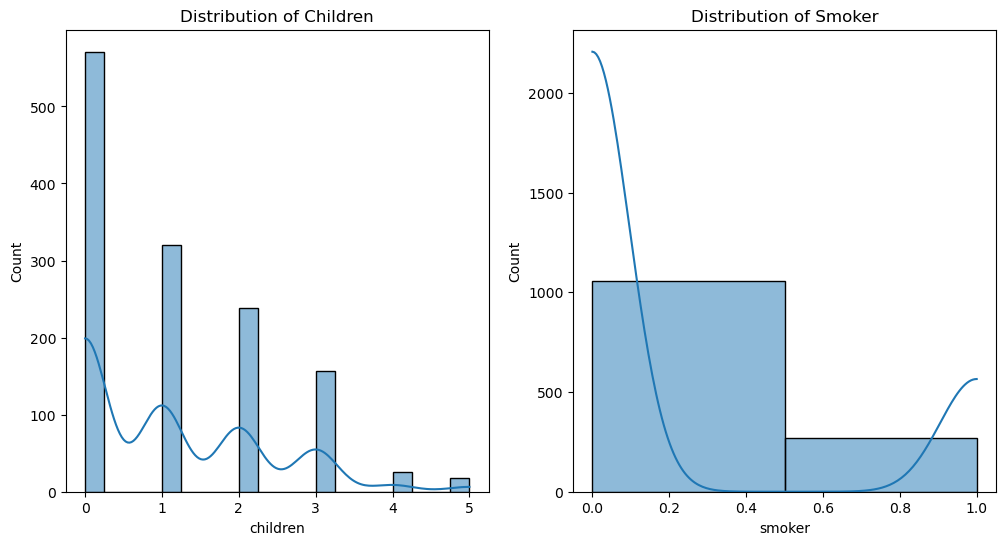

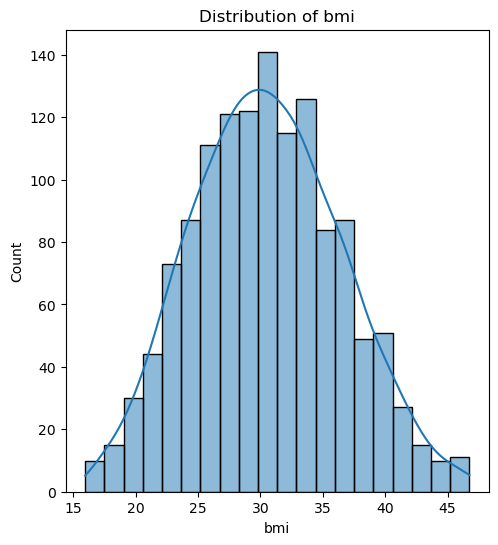

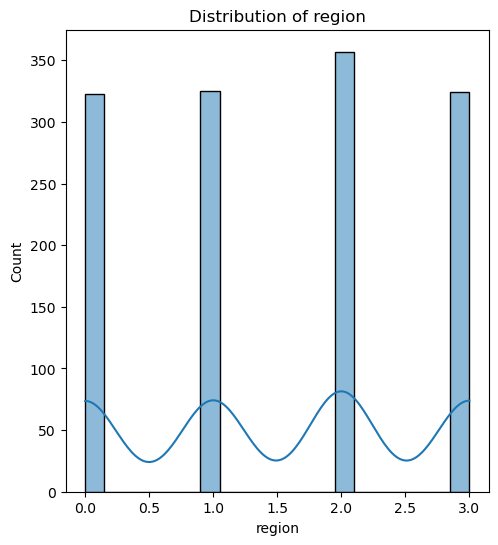

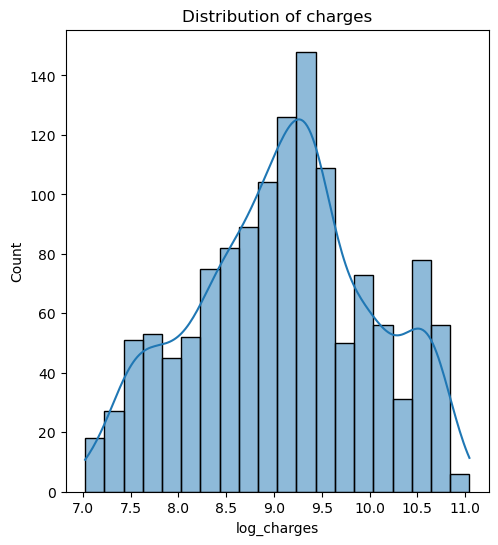

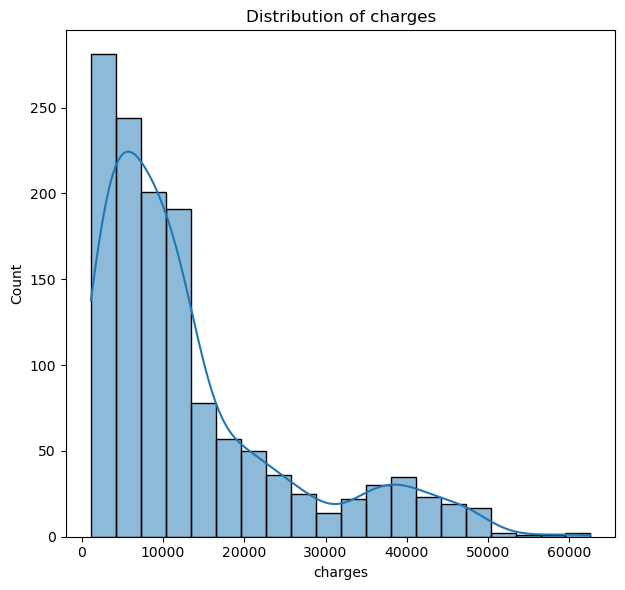

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Visualize distribution of age,,'sex','children','smoker','bmi','region','log_charges' columns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['age'], bins=20, kde=True)
plt.title('Distribution of age')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['sex'], bins=20, kde=True)
plt.title('Distribution of sex')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['children'], bins=20, kde=True)
plt.title('Distribution of Children')


plt.subplot(1, 2, 2)
sns.histplot(df1['smoker'], bins=2, kde=True)
plt.title('Distribution of Smoker')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['bmi'], bins=20, kde=True)
plt.title('Distribution of bmi')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['region'], bins=20, kde=True)
plt.title('Distribution of region')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['log_charges'], bins=20, kde=True)
plt.title('Distribution of charges')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['charges'], bins=20, kde=True)
plt.title('Distribution of charges')


plt.tight_layout()
plt.show()


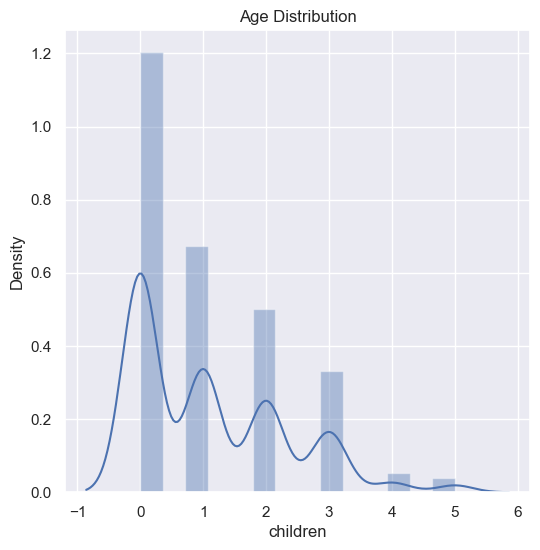

In [50]:
# Plotting the distribution of children columns
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df1['children'])
plt.title("Age Distribution")
plt.show()

In [51]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges,log_charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.513168,13212.333374,9.097210
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.106532,11997.236429,0.916326
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,7.023647
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200,8.463638
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800,9.144449
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710,9.716405
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090,11.044423


After encoding the categorical columns we can see all columns details here.The counts of all columns are same that means now no null values are present in this datasets.

# Correlation 

In [52]:
cor=df1.corr()
cor

,age,sex,bmi,children,smoker,region,charges,log_charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022,0.529296
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394,0.009959
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196,0.133920
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739,0.161725
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912,0.663619
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730,-0.044967
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000,0.893973
log_charges,0.529296,0.009959,0.133920,0.161725,0.663619,-0.044967,0.893973,1.000000


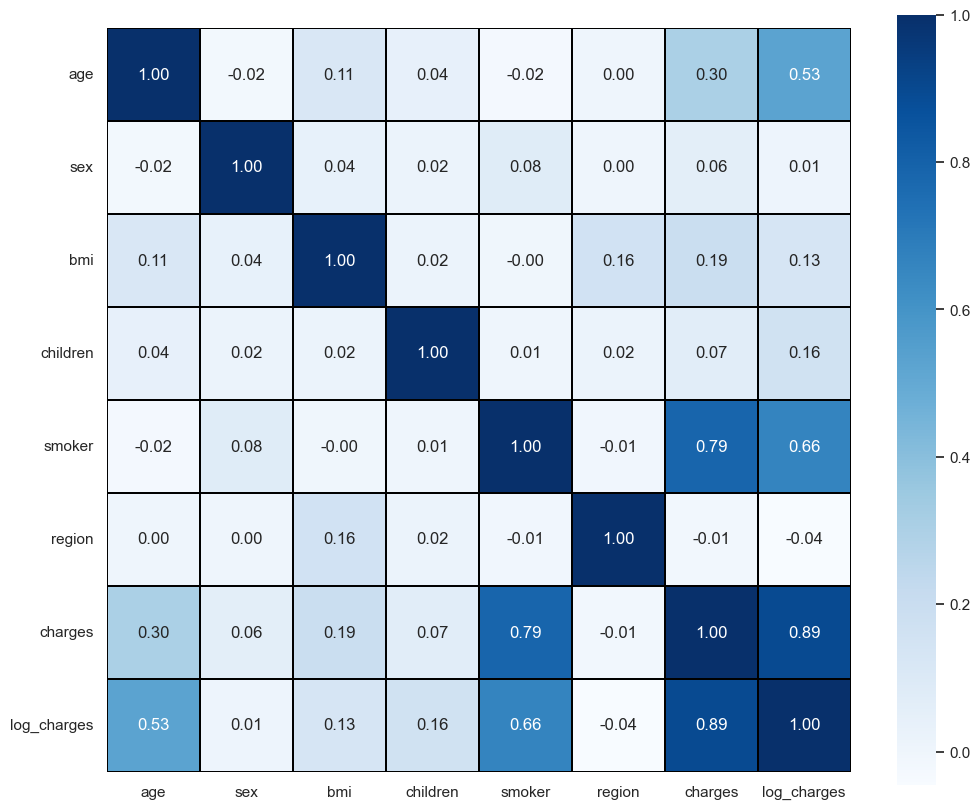

In [53]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df1.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f',         # Format of annotations (2 decimal places)
            square=True)       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


# Correlation between label and features

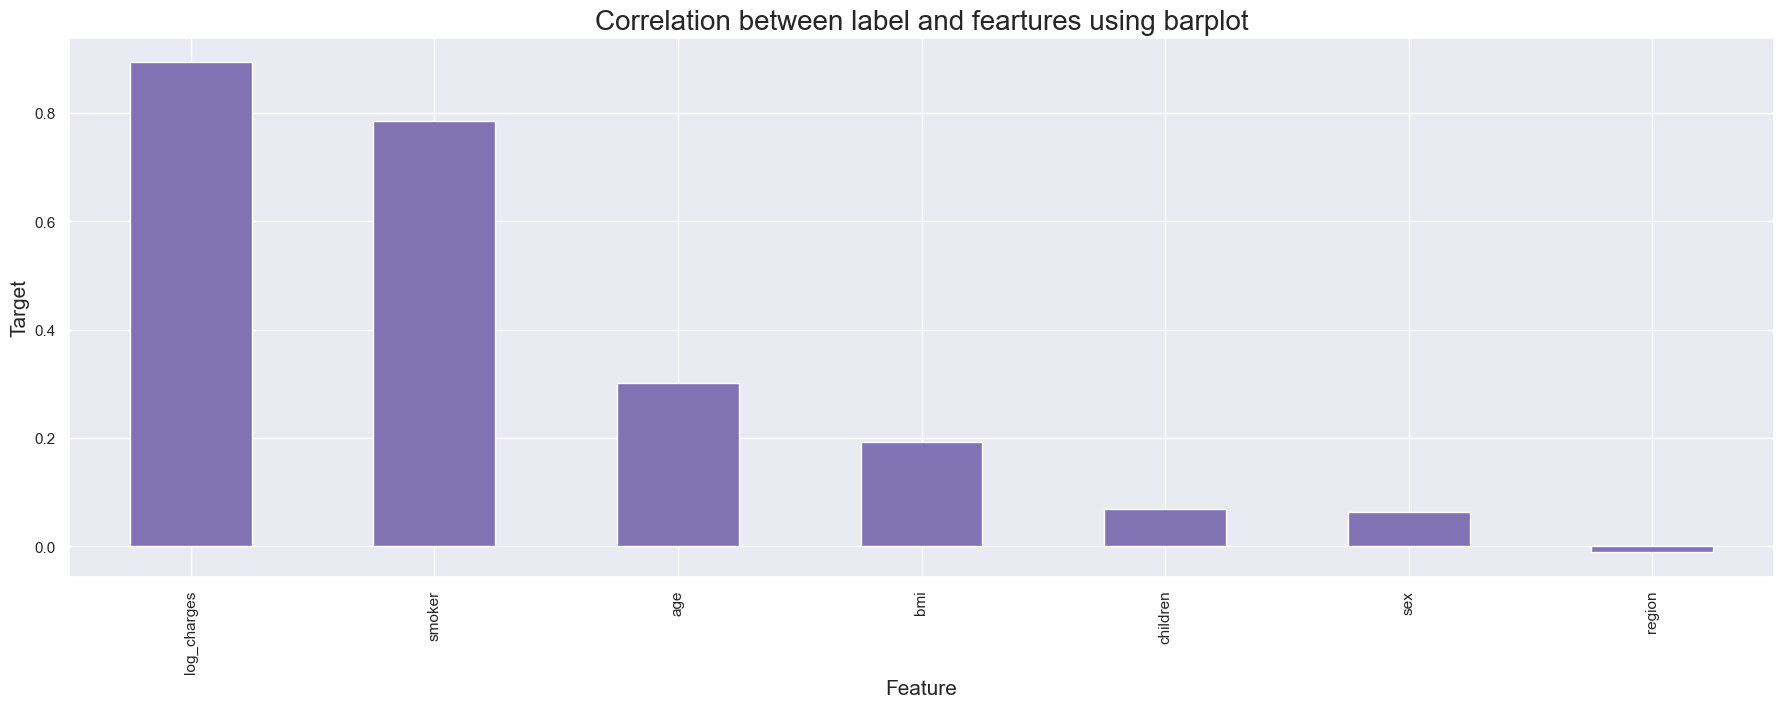

In [54]:
plt.figure(figsize=(22,7))
df1.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize =15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and feartures using barplot",fontsize=20)
plt.show()

Here we can see that  region column is very low correlation to each other

# Split the features and target

In [56]:
# Separating the independent and target varaible into x and y
x = df1.drop(['charges', 'log_charges'], axis=1)  # Features we remove both charges and log_charges
y = df1['log_charges']    #  Here now the log charges is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (1329, 6)
Label Dimensions (1329,)


In [57]:
print(x)

      age  sex     bmi  children  smoker  region
0      19  0.0  27.900         0     1.0     3.0
1      18  1.0  33.770         1     0.0     2.0
2      28  1.0  33.000         3     0.0     2.0
3      33  1.0  22.705         0     0.0     1.0
4      32  1.0  28.880         0     0.0     1.0
...   ...  ...     ...       ...     ...     ...
1333   50  1.0  30.970         3     0.0     1.0
1334   18  0.0  31.920         0     0.0     0.0
1335   18  0.0  36.850         0     0.0     2.0
1336   21  0.0  25.800         0     0.0     3.0
1337   61  0.0  29.070         0     1.0     1.0

[1329 rows x 6 columns]


In [58]:
print(y)

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: log_charges, Length: 1329, dtype: float64


# Feature scaling  using standard scalirization

In [59]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
# Display the standardized DataFrame
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.008311,-0.445670,-0.907940,1.975869,1.344193
1,-1.509976,0.991757,0.546267,-0.079764,-0.506106,0.440128
2,-0.797855,0.991757,0.416149,1.576587,-0.506106,0.440128
3,-0.441794,0.991757,-1.323542,-0.907940,-0.506106,-0.463937
4,-0.513006,0.991757,-0.280065,-0.907940,-0.506106,-0.463937
...,...,...,...,...,...,...
1324,0.768813,0.991757,0.073111,1.576587,-0.506106,-0.463937
1325,-1.509976,-1.008311,0.233646,-0.907940,-0.506106,-1.368002
1326,-1.509976,-1.008311,1.066737,-0.907940,-0.506106,0.440128
1327,-1.296340,-1.008311,-0.800536,-0.907940,-0.506106,1.344193


# Find the best Model

In [60]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Creating train test split

In [61]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    
    # Initializing and training the Support Vector Regressor
    GBR = GradientBoostingRegressor()
    GBR.fit(x_train, y_train)
    pred = GBR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_State",maxRS)

Maximum r2 score is  0.900170321014655 on Random_State 91


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=91)

In [63]:
x_train

,age,sex,bmi,children,smoker,region
201,1.480934,-1.008311,-1.098793,-0.907940,-0.506106,-0.463937
874,-1.225127,0.991757,0.720320,1.576587,-0.506106,1.344193
1173,-1.082703,-1.008311,-0.103477,-0.907940,-0.506106,-0.463937
1086,0.768813,-1.008311,0.534438,2.404762,-0.506106,1.344193
153,0.056691,-1.008311,-0.857991,-0.079764,-0.506106,-1.368002
...,...,...,...,...,...,...
869,-1.153915,-1.008311,-0.408493,-0.907940,-0.506106,-0.463937
494,0.412752,0.991757,-0.310482,0.748411,-0.506106,1.344193
116,-0.726642,-1.008311,-0.438910,-0.079764,1.975869,0.440128
210,0.056691,0.991757,0.057058,2.404762,-0.506106,-0.463937


In [64]:
y_train

202     9.473720
880     8.144407
1181    7.955665
1094    9.332588
154     8.864773
          ...   
875     7.897710
497     8.990811
117     9.857903
211     9.007455
179     9.052433
Name: log_charges, Length: 930, dtype: float64

In [65]:
x_test

,age,sex,bmi,children,smoker,region
54,0.056691,-1.008311,-0.312172,1.576587,-0.506106,-0.463937
77,-1.296340,0.991757,0.843679,-0.907940,-0.506106,0.440128
562,-0.085733,-1.008311,1.694513,-0.079764,-0.506106,-0.463937
702,0.840025,-1.008311,1.271208,-0.907940,1.975869,0.440128
676,-1.296340,-1.008311,-2.220002,-0.079764,-0.506106,1.344193
...,...,...,...,...,...,...
587,0.555176,0.991757,-1.853307,-0.079764,-0.506106,-0.463937
801,0.412752,-1.008311,0.891839,-0.907940,-0.506106,-0.463937
910,0.270328,-1.008311,-0.617188,-0.907940,1.975869,-0.463937
1044,1.765782,0.991757,-0.697456,-0.907940,-0.506106,-1.368002


In [66]:
y_test

54       8.994753
77       7.335288
566      8.760070
706     10.701026
680      7.857972
          ...    
591      9.039442
805      8.953234
916      9.988533
1051     9.574675
142      9.850798
Name: log_charges, Length: 399, dtype: float64

In [67]:
# Assuming x_test, y_test, x_train, y_train are your datasets
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_test shape: (399, 6)
y_test shape: (399,)
x_train shape: (930, 6)
y_train shape: (930,)


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# Linear Regression

In [69]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print(LR)
print("R2_Score: ",r2_score(y_test,pred_LR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_LR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score:  0.8245734090462022
R2_Score on training Data:  74.04498165015036
Mean Absolute error:- 0.2494887415462692
Mean Squared error:- 0.14578766448000963
Root Mean Squared Error:- 0.38182150866603837


# Random Forest regressor

In [70]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_RFR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_Score:  0.8649091747611495
R2_Score on training Data:  96.6518143238311
Mean Absolute error:- 0.1879263019859783
Mean Squared error:- 0.11226676524447843
Root Mean Squared Error:- 0.33506233038716604


# K Neighbors Regressor

In [71]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_knn))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:-",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.8466975913415651
R2_Score on training Data:  83.72148850735495
Mean Absolute error:- 0.229578295985686
Mean Squared error:- 0.1274014389492381
Root Mean Squared Error:- 0.3569333816683978


# Gradient Booster Regressor

In [72]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_GBR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_Score:  0.9006192938443034
R2_Score on training Data:  86.85366304426667
Mean Absolute error:- 0.16245796781213284
Mean Squared error:- 0.08258999371782223
Root Mean Squared Error:- 0.2873847485824922


# Decision Tree Regressor

In [73]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_dtr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))


R2_Score:  0.6285120932991174
R2_Score on training Data:  99.70256261694286
Mean Absolute error:- 0.25033936827611264
Mean Squared error:- 0.3087237459613698
Root Mean Squared Error:- 0.5556291442692417


# Support Vector Regressor

In [73]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_svr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_svr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.9105137130971629
R2_Score on training Data:  81.03021692166703
Mean Absolute error:- 0.13956795262317345
Mean Squared error:- 0.07436727066074393
Root Mean Squared Error:- 0.2727036315503406


# Checking cross validation score

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
score=cross_val_score(LR,x,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.79826833 0.68874983 0.82870346 0.76453    0.73208842]
0.7624680089658247
Difference between R2 score and cross validation score is- 6.210540008037757


In [76]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.85650749 0.69980888 0.85028216 0.82771481 0.78955424]
0.8047735146861287
Difference between R2 score and cross validation score is- 6.089016298282745


In [77]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.84904787 0.68921968 0.84257334 0.80867779 0.78275127]
0.7944539919133988
Difference between R2 score and cross validation score is- 5.224359942816625


In [78]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.87638047 0.7292406  0.90129343 0.83780412 0.79809181]
0.8285620848927818
Difference between R2 score and cross validation score is- 7.213935281820383


In [79]:
score5 = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_svr)-score.mean())*100)

[0.79826833 0.68874983 0.82870346 0.76453    0.73208842]
0.7624680089658247
Difference between R2 score and cross validation score is- 14.804570413133822


From difference between R2 score and cross validation score computed on R2 socre we canconclude that K neighbors regressor as our best fiiting and best performing model

# Hyper parameter tuning

In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to find the best parameters
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
Best R2 Score: 0.7683552440809922


In [81]:
# Initialize KNN Regressor with best hyperparameters
knn_regressor = KNeighborsRegressor(n_neighbors=9, weights='uniform', algorithm='auto')


In [82]:
# Train the KNN regressor
knn_regressor.fit(x_train, y_train)


KNeighborsRegressor(n_neighbors=9)

In [83]:
# Make predictions
y_pred = knn_regressor.predict(x_test)


In [84]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R2 Score: 0.8712078529154088
Mean Squared Error: 0.10703227044851801


# Now saving the model using joblib library

In [87]:
# Saving the model
import joblib
joblib.dump(knn_regressor,"Medical_cost_insurance.pkl")

['Medical_cost_insurance.pkl']

In [88]:
# Open the file
import pickle
filename = "Medical_cost_insurance.pkl"
pickle.dump(knn_regressor, open(filename,'wb'))  #Saved model

In [89]:
load_model = pickle.load(open("Medical_cost_insurance.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

87.12078529154088


In [90]:
# Here the values is come in this type because we have reduced the skewness of the charges column 
# so thats why value is predict this type
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
Predicted,8.897805,7.307357,8.882112,10.650414,7.867169,8.258838,9.132753,8.517500,8.935339,9.243961,...,10.655133,9.303776,10.230192,8.696216,8.522414,8.900508,9.000782,10.186893,9.372399,9.944773
Original,8.994753,7.335288,8.760070,10.701026,7.857972,7.464776,9.061411,8.357434,8.882211,8.275569,...,10.797249,9.329504,10.390512,8.459675,8.176167,9.039442,8.953234,9.988533,9.574675,9.850798


# Here we predict medical insurance cost

In [91]:
import numpy as np


# Define input data (medical characteristics)
input_data = np.array([[50,1,30.97,3,0,1]])  # Example input data (single sample)

# Make prediction using the trained SVR model
prediction = knn_regressor.predict(input_data)  # Use 'svr' for prediction
print("Predicted Insurance Cost:", prediction)


Predicted Insurance Cost: [9.51923863]


In [93]:

# Example predicted value from a model in log-transformed scale
predicted_log_value =prediction

# Apply exponential transformation to convert the predicted value back to original scale
predicted_original_value = np.expm1(predicted_log_value)

# Print the converted predicted value in the original scale
print("Here is the predicted charge for medical insurance:", predicted_original_value)

Here is the predicted charge for medical insurance: [13618.23797371]


# THANK YOU